In [1]:
suppressPackageStartupMessages(library("DESeq2"))
suppressPackageStartupMessages(library("ggplot2"))
suppressPackageStartupMessages(library("stringr"))
suppressPackageStartupMessages(library("tidyr"))

In [2]:
setwd('/nfs/lab/projects/islet_cytok/analysis/snATAC/peaks/')

In [3]:
cells = c('beta','acinar','alpha','delta','endothelial','stellate')

### Separate bacodes with demultipelxed file

In [8]:
barcode_list = read.table('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/onlyIslets_umap.cytunt.txt', 
                          sep="\t",header=T)

In [9]:
names_list = read.table('/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/onlyIslets_names.cytunt.txt', 
                          sep="\t",header=T)

In [10]:
names_list = merge(barcode_list, names_list, by = c('X', 'leiden', 'cluster'))

In [11]:
names_list$treat = str_split_fixed(names_list$X, "\\_",5)[,3]
names_list$treat2 = substr(str_split_fixed(names_list$X, "\\_",2)[,1],5 ,7)
names_list$treat[names_list$treat==""]<-names_list$treat2[names_list$treat==""]

In [12]:
names_list$bc = gsub( 'scATAC_islet7453_unt_500' , "unt500" , names_list$X)
names_list$bc = gsub( 'scATAC_islet7453_cyt' , "cyt" , names_list$bc)
names_list$bc = gsub( 'scATAC_islet4807_unt_4000' , "unt4000" , names_list$bc)
bc = str_split_fixed(names_list$bc, "\\_",2)
names_list$barcode = paste0("CB:Z:", bc[,2], "-1")

In [13]:
names_list$bam = paste0(names_list$experiment, '.filt.rmdup.bam')

In [18]:
dem_cyt = read.table('/nfs/lab/mokino/SP21/scATAC_demuxlet/28apr21_1000cyt_demux.tsv', header=T)
dem_unt = read.table('/nfs/lab/mokino/SP21/scATAC_demuxlet/28apr21_1000unt_demux.tsv', header=T)

In [25]:
dem_cyt$bc = paste("1000cytokine",dem_cyt$barcode , sep="_")
dem_unt$bc = paste("1000untreated",dem_unt$barcode , sep="_")
dem = rbind(dem_cyt, dem_unt)

In [136]:
table(dem_unt$demuxlet_best)


DBL-4-islet-GT-4_4-islet-GT-4-5-islet-GT-5_5-islet-GT-5-0.500 
                                                           38 
DBL-5-islet-GT-5_5-islet-GT-5-4-islet-GT-4_4-islet-GT-4-0.500 
                                                            2 
                                SNG-4-islet-GT-4_4-islet-GT-4 
                                                          803 
                                SNG-5-islet-GT-5_5-islet-GT-5 
                                                          895 

In [28]:
samps = str_split_fixed(dem$demuxlet_best,'-islet', 2)[,1]
samps = gsub("SNG-", "islet", samps)

In [30]:
dem$samples = samps

In [48]:
table(names_list$experiment)


             1000cytokine             1000untreated scATAC_islet4807_unt_4000 
                     2492                      1738                      1304 
     scATAC_islet7453_cyt  scATAC_islet7453_unt_500 
                     1390                       905 

In [16]:
c(table(names_list$cluster))

acinar       alpha        beta       delta endothelial    stellate 
        327        2113        4267         541         219         362

In [37]:
dem$experiment  = paste(dem$samples, dem$condition, sep="_")
dem2            = dem[,c("bc", "experiment")]
ori             = names_list[,c("bc", "experiment")]
ori = subset(ori, !(experiment %in% c('1000cytokine', '1000untreated')))

all = rbind(dem2, ori)

colnames(all)[2] = "samples"

names_list = merge(names_list, all, by="bc")

In [135]:
895 + 803
1387+ 1072

[1] 1698

[1] 2459

In [46]:
table(names_list$samples)


                AMB-5_cyt                 DBL-4_cyt                 DBL-4_unt 
                        1                        29                        38 
                DBL-5_cyt                 DBL-5_unt                islet4_cyt 
                        3                         2                      1387 
               islet4_unt                islet5_cyt                islet5_unt 
                      803                      1072                       895 
scATAC_islet4807_unt_4000      scATAC_islet7453_cyt  scATAC_islet7453_unt_500 
                     1304                      1390                       905 

In [58]:
write.table(names_list, "/nfs/lab/projects/islet_cytok/analysis/snATAC/barcode_and_cluster_demux.tsv", quote=F )

In [160]:
names_list$donor = gsub("_cyt" , "",names_list$samples)
names_list$donor = gsub("_unt" , "",names_list$donor)
names_list$donor = gsub("_500" , "",names_list$donor)

In [179]:
table(names_list$donor)


                AMB-5                 DBL-4                 DBL-5 
                    1                    67                     5 
               islet4                islet5 scATAC_islet4807_4000 
                 2190                  1967                  1304 
     scATAC_islet7453 
                 2295 

In [168]:
SampleC = data.frame(brewer.pal(9, "Paired")[c(2,7,6,4)], 
                     c('islet4', "islet5", 'scATAC_islet7453', 'scATAC_islet4807_4000'))

In [171]:
getwd()

[1] "/nfs/lab/projects/islet_cytok/analysis/snATAC/peaks"

In [173]:
png("../../cytokine_figures/UMAP_donors.png", width = 2, height = 2, units = 'in', res = 300)
par (mar=c(0,0,0,0))

plot(UMAP2~UMAP1, names_list, pch = 16, 
     col = as.character(SampleC[,1])[match(names_list$donor, SampleC[,2])], cex=0.3, bty='o')
dev.off()
#legend("bottomleft", pch=19, col = as.character(SampleC[,1]))

png 
  2

In [176]:
pdf("../../cytokine_figures/samp_leg.pdf")

plot.new()
legend("center", pch=19, col = as.character(SampleC[,1]), legend= SampleC[,2])
dev.off()

png 
  2

In [186]:
pdf("../../cytokine_figures/UMAP_donors_separated.pdf")
par (mfrow=c(2,2))
for (x in 1:4){
    sa = c('islet4','islet5',  'scATAC_islet7453','scATAC_islet4807_4000')[x]
    main = c('islet3535', 'islet9245', 'islet7453', 'islet4807')[x]
plot(UMAP2~UMAP1, names_list[names_list$donor==sa,], pch = 16, main=main,
    # col = as.character(SampleC[,1])[match(names_list$donor[names_list$donor==sa], SampleC[,2])], 
     col = as.factor(names_list$treat[names_list$donor==sa]),
     cex=0.3, bty='o')
}
    dev.off()


png 
  2

In [196]:
ag = as.data.frame(table(names_list$samples, names_list$leiden))
ag = ag[!grepl("-", ag$Var1),]
ag = spread(ag, key = Var2,value = Freq)

In [220]:
ag$Var1

[1] islet4_cyt                islet4_unt               
[3] islet5_cyt                islet5_unt               
[5] scATAC_islet4807_unt_4000 scATAC_islet7453_cyt     
[7] scATAC_islet7453_unt_500 
12 Levels: AMB-5_cyt DBL-4_cyt DBL-4_unt DBL-5_cyt DBL-5_unt ... scATAC_islet7453_unt_500

In [223]:
coll = as.character(SampleC[c(1,1,2,2,4,3,3),1])

In [225]:
cytunt = c(1,0,1,0,0,1,0)

In [233]:
pct = t(t(ag[,-1])/colSums(ag[,-1]))

In [262]:
pdf("../../cytokine_figures/UMAP_donors_barplot.pdf", height = 4, width = 4)
par(mar = c(2,2,4,4), xpd=T)
barplot(pct, col=coll)
barplot(pct, density=c(0,20)[cytunt+1] , border=F, add=T, col=1)
legend("right", pch=15, col = as.character(SampleC[,1]), pt.cex=1.5,bty="n",
       legend= c('isl3535', 'isl9245', 'isl7453', 'isl4807'),inset=c(-0.3,0))
legend("bottomright",  density=c(20,0), legend=c('cyt', 'unt'),bty="n",inset=c(-0.25,0.15))
dev.off()

png 
  2

In [263]:
ag2 = as.data.frame(table(names_list$donor, names_list$leiden))
ag2 = ag2[!grepl("-", ag2$Var1),]
ag2 = spread(ag2, key = Var2,value = Freq)

In [267]:
pct2 = t(t(ag2[,-1])/colSums(ag2[,-1]))

In [265]:
ag3 = as.data.frame(table(names_list$treat, names_list$leiden))
ag3 = spread(ag3, key = Var2,value = Freq)

In [268]:
pct3 = t(t(ag3[,-1])/colSums(ag3[,-1]))

In [274]:
ag3

Var1,0,1,2,3,4,5,6,7,8,9
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
cyt,840,934,251,683,256,282,120,185,215,116
unt,1063,858,390,472,285,286,207,136,147,103


In [273]:
pct3

0,1,2,3,4,5,6,7,8,9
0.4414083,0.5212054,0.3915757,0.591342,0.4731978,0.4964789,0.3669725,0.576324,0.5939227,0.5296804
0.5585917,0.4787946,0.6084243,0.408658,0.5268022,0.5035211,0.6330275,0.423676,0.4060773,0.4703196


In [277]:
pdf("../../cytokine_figures/UMAP_donors_barplot_sep.pdf")
par(mfrow = c(2,2), xpd=T)
barplot(pct2, col=as.character(SampleC[c(1,2,4,3),1]))
legend("right", pch=15, col = as.character(SampleC[,1]), pt.cex=1.5,bty="n",
       legend= c('isl3535', 'isl9245', 'isl7453', 'isl4807'),inset=c(-0.3,0))

barplot(pct3, density=c(20,0) ,  col=1)
legend("right",  density=c(20,0), legend=c('cyt', 'unt'),bty="n",inset=c(-0.22,0.15))
dev.off()

png 
  2

### Remake bam files and count matrices

In [49]:
samples = c('islet4_cyt', 'islet4_unt','islet5_cyt', 'islet5_unt', 'scATAC_islet7453_cyt','scATAC_islet7453_unt_500' )
sampdir = '/nfs/lab/elisha/islets/cytokine/new_islet/gaulton/peaks/gatsby/'
newdir  = '/nfs/lab/projects/islet_cytok/analysis/snATAC/bams_demux/'

In [50]:
make_cluster_bam = function(s, celltypes, sampdir) {
    
    
     system(paste0('mkdir -p ',newdir, s, '/cell_type_bam'))
     setwd(paste0(newdir, s,'/cell_type_bam'))
     d   = names_list$experiment[names_list$samples==s] [1]
     bam = paste0(sampdir,  d, '/',  d, '.filt.rmdup.bam')
     system(paste("samtools view -H", bam ,"> SAM_header"))
   
    for (cell in celltypes) {
        
        barcodes = names_list$barcode[names_list$samples==s & names_list$cluster==cell]
        writeLines(as.character(barcodes), cell)
        system(paste('samtools view', bam , '| LC_ALL=C grep -F -f', cell , '> filtered_SAM_body'))
        system("cat SAM_header filtered_SAM_body > filtered.sam")
        system(paste0("samtools view -b filtered.sam > ", s, "_",cell, ".bam"))
        system('rm filtered.sam filtered_SAM_body')
        system(paste0("samtools index ", s, "_",cell, ".bam"))
}

     
}

In [ ]:
setwd(sampdir)
celltypes = cells
mclapply(samples, function(x) make_cluster_bam(s=x, celltypes=celltypes, sampdir=sampdir ) , mc.cores = 32)  

[[1]]
NULL

[[2]]
NULL

[[3]]
NULL

[[4]]
NULL

[[5]]
NULL

[[6]]
NULL

In [55]:
bamdir   = '/nfs/lab/projects/islet_cytok/analysis/snATAC/bams_demux/'
outdir   = '/nfs/lab/projects/islet_cytok/analysis/snATAC/peaks/'
saf      = '/nfs/lab/projects/islet_cytok/analysis/snATAC/peaks/Islet_bulkATAC.saf'

In [56]:
featurecounts = function(c){

count_matrix = paste0(outdir,  "/", c, '.count_matrix_demux')    
bam = paste0(bamdir, samples, '/cell_type_bam/',samples, "_", c, ".bam")
gi  <-  paste("featureCounts -p -T 10 -F SAF --donotsort -a" , saf, "-o",  count_matrix , 
                paste(bam,collapse=" "))
system(gi)
}


In [67]:
mclapply(celltypes,featurecounts, mc.cores = 16 )

[[1]]
[1] 0

[[2]]
[1] 0

[[3]]
[1] 0

### Run Deseq

In [4]:
setwd('/nfs/lab/projects/islet_cytok/analysis/snATAC/peaks/')

In [5]:
celltypes = cells

In [6]:
for(ce in celltypes){

TAB = read.table(paste0(ce, '.count_matrix_demux'), row.names=1, header=T)[,6:11]
colnames(TAB) = c('isl3535_cyt', 'isl3535_unt','isl9245_cyt', 'isl9245_unt', 
                  'isl7453_cyt','isl7453_unt' )
write.table(TAB, paste0("../../../geo_submission_oct21/processed_files/", ce, ".snATAC_count.matrix.txt")
            , sep="\t", quote=F)
    }

In [22]:
v = c()
for(ce in celltypes[1:2]){

TAB = read.table(paste0(ce, '.count_matrix_demux'), row.names=1, header=T)[,6:11]
colnames(TAB) = c('isl4_cyt', 'isl4_unt','isl5_cyt', 'isl5_unt', 
                  'isl7453_cyt','isl7453_unt' )
info = data.frame( sample = c('isl4', 'isl4', 'isl5', 'isl5','isl7453', 'isl7453'), 
                     treatment = rep(c("cyt", "unt"), rep=3), names = colnames(TAB)) 
TAB = subset(TAB, rowMeans(TAB)>1 )    ### subset matrix for minimum average read of 1
dds <-DESeqDataSetFromMatrix(TAB, colData = info, design = ~ sample + treatment)
  
dds     <- DESeq(dds)    
res     <- results(dds, contrast=c("treatment", "cyt", "unt")  )
    v[ce]  = sum(res$padj <0.1, na.rm=T)
    res     = res[order(res$pvalue),]
    write.csv(res, paste0(ce, '.deseq_results_demux_final.csv') )  
    }

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing



In [8]:
v

beta      acinar       alpha       delta endothelial    stellate 
       2412           0         226          10           0           0

In [9]:
library(pheatmap)
library(RColorBrewer)

In [10]:
for(ce in cells){
TAB = read.table(paste0(ce, '.count_matrix_demux'), row.names=1, header=T)[,6:11]
if(ce == cells[1]) { tab= TAB}else{
    tab= cbind(tab, TAB)}
    }
colnames(tab) = paste(rep(cells, each=6), c('isl4_cyt', 'isl4_unt','isl5_cyt', 'isl5_unt', 
                  'isl7453_cyt','isl7453_unt' ), sep="_")

In [11]:
info = data.frame(cell   = rep(cells, each=6), 
                  sample = rep(c('isl4', 'isl4', 'isl5', 'isl5','isl7453', 'isl7453') ,6), 
                  treatment = rep(c("cyt", "unt"), rep=18), names = colnames(tab))
dds <-DESeqDataSetFromMatrix(tab, colData = info, design = ~ sample + treatment)
vld <- vst(dds)


Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.



In [12]:
mat = assay(vld)

In [13]:
beta =read.csv("beta.deseq_results_demux_final.csv", row.names=1)

In [14]:
alpha =read.csv("alpha.deseq_results_demux_final.csv", row.names=1)
delta =read.csv("delta.deseq_results_demux_final.csv", row.names=1)

In [15]:
acinar =read.csv("acinar.deseq_results_demux_final.csv", row.names=1)
endothelial =read.csv("endothelial.deseq_results_demux_final.csv", row.names=1)
stellate =read.csv("stellate.deseq_results_demux_final.csv", row.names=1)

In [16]:
table(beta$log2FoldChange>0, beta$padj<0.1)

       
        FALSE  TRUE
  FALSE 59150   131
  TRUE  57509  2281

In [17]:
matd = subset(mat, rownames(mat) %in% c(rownames(beta)[beta$padj<0.1], 
                                        rownames(alpha)[alpha$padj<0.1],
                                        rownames(delta)[delta$padj<0.1]   ))

In [18]:
dim(matd)

[1] 2464   36

In [19]:
annot = info[,1:3]
rownames(annot)  = info$names
colnames(annot) = c("Celltype", "Sample", "Treatment")
Celltype           = c('#33A02C', '#A6CEE3',  '#FF7F00', '#E7298A', '#666666', '#CAB2D6')
names(Celltype)    = cells

Sample = brewer.pal(9, "Paired")[c(2,7,6)]
names(Sample )   = c('isl4', "isl5", 'isl7453')

Treatment = brewer.pal(9, "Paired")[3:4]
names(Treatment )   = c('cyt', 'unt')

annocol = list(Celltype = Celltype, Sample = Sample, Treatment = Treatment)

In [20]:
hcol = colorRampPalette(brewer.pal(9, "PuOr"))(50)

In [21]:
pheatmap(matd, annotation_col = annot, show_rownames = F, show_colnames = F, treeheight_row = F,
         annotation_colors = annocol,cellwidth = 10, cellheight = 0.1,
         file = "/nfs/lab/projects/islet_cytok/analysis/cytokine_figures/Heatmap_2464DAC_demux2.png",
         scale="row", col=hcol, )

### Compare with the bulk differential

In [10]:
cyt = read.table('../../deseq_ATAC_NEW/cytokine_24hr_Hi.dec16.filtered.txt')
cyt = cyt[order(cyt$pvalue),]
rownames(cyt) = gsub("peak-","", rownames(cyt))

In [96]:
mat2 = mat

In [18]:
rownames(mat2) = gsub(":", "-", rownames(mat))

In [98]:
matd2 = mat2[rownames(cyt)[cyt$padj<0.1] ,]

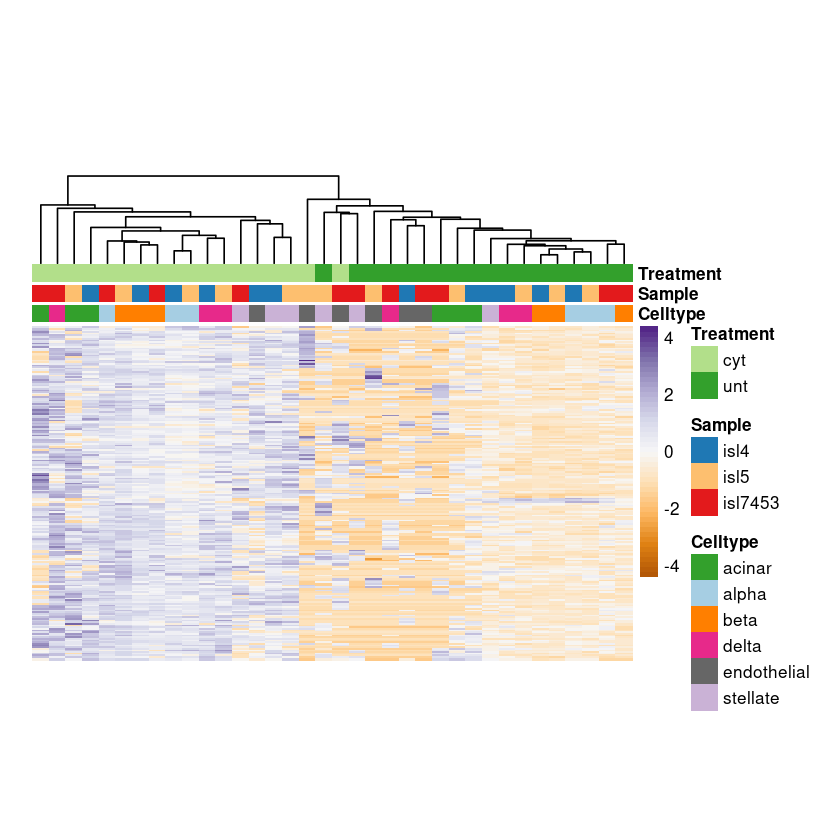

In [99]:
pheatmap(matd2[1:200,], annotation_col = annot, show_rownames = F, 
         show_colnames = F, 
         treeheight_row = F,
         cellwidth = 10, cellheight = 1,
         annotation_colors = annocol,
         scale="row", col=hcol, )

Identify differential sites in beta that are obscured in bulk

Evaluate effects in cell types (beta) -- log2FC?

In [11]:
rownames(beta) = gsub(":", "-", rownames(beta))

In [31]:
rownames(alpha) = gsub(":", "-", rownames(alpha))

In [87]:
me = merge(cyt[,c(1,2,6)], beta[,c(1,2,6)], by="row.names")

In [88]:
sum(beta$padj<0.1, na.rm=T)

[1] 2412

In [89]:
table(me$padj.x<0.1, me$padj.y<0.1)

       
        FALSE  TRUE
  FALSE 91234    24
  TRUE  25425  2388

 24 were specific to beta

In [90]:
su = subset(me, padj.x<0.1 | padj.y<0.1)
su[is.na(su[,7]),7]<-1
su[is.na(su[,4]),4]<-1
su$col = as.factor(paste0(as.numeric(su[,4]<0.1), as.numeric(su[,7]<0.1)))
su=su[order(-su[,7]),]
col3=c("red3", "gray", "#253494")


In [71]:
png("/nfs/lab/projects/islet_cytok/analysis/cytokine_figures/scatterplot_deseq_betacells.png",width = 3, height = 3, units = 'in', res = 300)
par(mar=c(0,0,0,0))
plot(su$log2FoldChange.x,su$log2FoldChange.y, col =col3[as.numeric(su$col)] , cex=0.5,
     xlab="Bulk log2FC", ylab="Beta log2FC", axes=F)
dev.off()

png 
  2

In [72]:
pdf("/nfs/lab/projects/islet_cytok/analysis/cytokine_figures/scatterplot_deseq_betacells.pdf")
plot(su$log2FoldChange.x,su$log2FoldChange.y, col =col3[as.numeric(su$col)] , 
     xlab="Bulk log2FC", ylab="Beta log2FC", pch="")
abline(h=0, v=0, col="gray")
legend("topleft", col=col3, pch=19, legend=c("only beta", "only bulk","both"))
dev.off()

png 
  2

In [75]:
table(su$col)


   01    10    11 
   24 32557  2388 

In [26]:
bed = str_split_fixed(su[su$padj.y<0.1 & su$log2FoldChange.y>0,1], "\\-",3)
write.table(bed, "homer_beta_v2/Beta_diffUP.bed", col.names=F,row.names=F, quote=F, sep="\t")

In [27]:
bed = str_split_fixed(su[su$padj.y<0.1 & su$log2FoldChange.y<0,1], "\\-",3)
write.table(bed, "homer_beta_v2/Beta_diffDOWN.bed", col.names=F,row.names=F, quote=F, sep="\t")

In [28]:
run_homer = function(bedfile, outdir, bgfile )
{
    system(paste ('findMotifsGenome.pl', bedfile, '/nfs/lab/KG/ref/male.masked.hg19.fa', 
       outdir,  '-bg', bgfile,  '-nomotif' ))
}

In [29]:
run_homer(bedfile = paste0(getwd(),"/homer_beta_v2/Beta_diffUP.bed"),
          outdir  = paste0(getwd(),"/homer_beta_v2/beta_spec.up"),
          bgfile  = paste0(getwd(),"/homer_beta/all.up.bed"))

In [30]:
run_homer(bedfile = paste0(getwd(),"/homer_beta_v2/Beta_diffDOWN.bed"),
          outdir  = paste0(getwd(),"/homer_beta_v2/beta_spec.down"),
          bgfile  = paste0(getwd(),"/homer_beta/all.down.bed"))

Effects are similar-

In [91]:
su2 = subset(me, padj.x<0.1 & padj.y<0.1)

In [74]:
pdf("/nfs/lab/projects/islet_cytok/analysis/cytokine_figures/densityeffects.pdf")
par(pin=c(2,1))
plot(density(su2$log2FoldChange.x), xlim=c(-4,8))
lines(density(su2$log2FoldChange.y), col="red")
dev.off()

png 
  2

In [96]:
wilcox.test(abs(su2$log2FoldChange.x),abs(su2$log2FoldChange.y), paired=T)


	Wilcoxon signed rank test with continuity correction

data:  abs(su2$log2FoldChange.x) and abs(su2$log2FoldChange.y)
V = 65077, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0


In [24]:
head(beta)

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr5-131813055-131815697,110.46693,3.642718,0.3308684,11.009567,3.436522e-28,4.091902e-23
chr5-131815845-131817201,70.89374,4.478056,0.4526906,9.892089,4.505288e-23,2.682246e-18
chr17-74488515-74489821,64.91057,3.340552,0.3827038,8.728817,2.573499e-18,1.021430e-13
chr8-56918890-56919885,55.38153,3.295231,0.4104035,8.029246,9.807329e-16,2.919421e-11
chr14-100796710-100799927,356.03773,1.176443,0.1476173,7.969546,1.592583e-15,3.706730e-11
chr12-92945491-92946465,69.95783,2.805050,0.3528445,7.949820,1.867825e-15,3.706730e-11


### Compare the effects between alpha and beta cells

In [78]:
me = merge(alpha[,c(1,2,6)], beta[,c(1,2,6)], by="row.names")
table(me$padj.x<0.1, me$padj.y<0.1)

       
        FALSE  TRUE
  FALSE 69253  1478
  TRUE     46   174

In [79]:
su = subset(me, padj.x<0.1 | padj.y<0.1)
su[is.na(su[,7]),7]<-1
su[is.na(su[,4]),4]<-1
su$col = as.factor(paste0(as.numeric(su[,4]<0.1), as.numeric(su[,7]<0.1)))
su=su[order(-su[,7]),]



In [55]:
col3=c("red3", "goldenrod1", "#253494")

In [63]:
png("/nfs/lab/projects/islet_cytok/analysis/cytokine_figures/scatterplot_deseq_beta_alpha_cells.png",width = 3, height = 3, units = 'in', res = 300)
par(mar=c(0,0,0,0))
plot(su$log2FoldChange.x,su$log2FoldChange.y, col =col3[as.numeric(su$col)] , cex=0.5,pch=19,
     xlab="Bulk log2FC", ylab="Beta log2FC", axes=F)
dev.off()

png 
  2

In [64]:
pdf("/nfs/lab/projects/islet_cytok/analysis/cytokine_figures/scatterplot_deseq_beta_alpha_cells.pdf")
plot(su$log2FoldChange.x,su$log2FoldChange.y, col =col3[as.numeric(su$col)] , 
     xlab="Bulk log2FC", ylab="Beta log2FC", pch="")
abline(h=0, v=0, col="gray")
legend("topleft", col=col3, pch=19, legend=c("only beta", "only alpha","both"))
dev.off()

png 
  2

In [80]:
cor.test(su$log2FoldChange.x,su$log2FoldChange.y, method = "spearman")


	Spearman's rank correlation rho

data:  su$log2FoldChange.x and su$log2FoldChange.y
S = 768444510, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.6902877 


In [67]:
pdf("/nfs/lab/projects/islet_cytok/analysis/cytokine_figures/densityeffects_beta_alpha.pdf")
par(pin=c(2,1), mfrow=c(2,2))
plot(density(su$log2FoldChange.x), xlim=c(-4,8), col="goldenrod1")
lines(density(su$log2FoldChange.y), col="red")
plot(density(su$log2FoldChange.x[su$col=='11']), xlim=c(-4,8), col="goldenrod1")
lines(density(su$log2FoldChange.y[su$col=='11']), col="red")
dev.off()

png 
  2

In [65]:
table(su$col)


  01   10   11 
2234   52  174 

In [85]:
wilcox.test(abs(su$log2FoldChange.x), abs(su$log2FoldChange.y), paired=T)$p.value

[1] 1.147161e-255

In [86]:
wilcox.test(abs(su$log2FoldChange.x[su$col=='11']), abs(su$log2FoldChange.y[su$col=='11']), paired=T)$p.value

[1] 0.0008915839

### extra

In [1]:
setwd("/nfs/lab/projects/islet_cytok/analysis/snATAC/")

In [36]:
demux =read.table("barcode_and_cluster_demux.tsv")

In [5]:
ori = read.table('barcode_and_cluster_original.tsv')

In [7]:
ori$donor = ori$experiment
namevec =  setNames(object = demux$samples , nm = demux$X)
ori[names(namevec),'donor'] <- namevec
ori$donor[ori$donor %in% c("DBL-5_cyt",'DBL-4_cyt', 'AMB-5_cyt', 'DBL-5_unt', 'DBL-4_unt')]<-"unassigned"

In [20]:
table(ori$donor)


                    A0019                     C0025                     C0026 
                     5160                      6551                      5660 
               islet4_cyt                islet4_unt                islet5_cyt 
                     1387                       803                      1072 
               islet5_unt scATAC_islet4807_unt_4000      scATAC_islet7453_cyt 
                      895                      1304                      1390 
 scATAC_islet7453_unt_500                unassigned 
                      905                        73 

In [ ]:
ori$donor = ori$experiment
namevec =  setNames(object = demux$samples , nm = demux$X)
ori[names(namevec),'donor'] <- namevec
ori$donor[ori$donor %in% c("DBL-5_cyt",'DBL-4_cyt', 'AMB-5_cyt', 'DBL-5_unt', 'DBL-4_unt')]<-"unassigned"

In [37]:
colnames(demux)

[1] "bc"                        "X"                        
 [3] "leiden"                    "cluster"                  
 [5] "UMAP1"                     "UMAP2"                    
 [7] "unique_usable_reads"       "total_sequenced_reads"    
 [9] "duplicated_reads"          "unique_mito_reads"        
[11] "reads_in_peaks"            "reads_in_promoters"       
[13] "tss_used"                  "frac_reads_in_peaks"      
[15] "frac_reads_in_promoters"   "frac_promoters_used"      
[17] "frac_mito_reads"           "frac_duplicated_reads"    
[19] "experiment"                "log10_unique_usable_reads"
[21] "n_counts"                  "log_usable_counts"        
[23] "norm"                      "subset"                   
[25] "treat"                     "treat2"                   
[27] "barcode"                   "bam"                      
[29] "samples"

In [39]:
demux$donor = gsub("islet4_", "islet3535_", demux$samples)
demux$donor = gsub("islet5_", "islet9245_", demux$donor)


In [40]:
demux$donor = gsub("_cyt" , "",demux$donor)
demux$donor = gsub("_unt" , "",demux$donor)
demux$donor = gsub("_500" , "",demux$donor)

In [41]:
demux$donor = gsub("scATAC_" , "",demux$donor)
demux$donor = gsub("_4000" , "",demux$donor)

In [42]:
demux$donor[!(grepl("islet", demux$donor))] <- "unassigned"

In [43]:
table(demux$donor)


 islet3535  islet4807  islet7453  islet9245 unassigned 
      2190       1304       2295       1967         73 

In [45]:
write.table(demux, "barcode_and_cluster_demux.tsv", sep="\t")